### Data Dictionary

The final module of this course is a project to determine which basketball teams are most likely to make it to the semifinal round of the College Basketball Tournament known as the Final Four.

Focus is on Sweet Sixteen (S16), the Elite Eight (E8), and the Final Four (F4) in the post season

You will have access to historical data and will apply different classification algorithms to accomplish this.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, jaccard_score, log_loss

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *


pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("cbb.csv")

In [3]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,18.2,34.4,26.0,31.6,37.3,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,2019
1402,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,2019
1403,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,20.9,29.6,28.8,29.4,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
1404,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,37.1,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [5]:
df.describe(include='all')

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
count,1406,1406,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,272,272.000000,1406.000000
unique,355,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
top,Maine,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R64,NaN,NaN
freq,4,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN
mean,NaN,NaN,31.570413,16.724751,103.848720,103.849716,0.493272,50.406757,50.595448,18.458535,18.391821,28.881223,29.062376,34.612233,34.885633,49.486415,49.642745,34.662873,34.830228,69.292461,-7.855121,NaN,8.790441,2017.502134
std,NaN,NaN,2.586927,6.492069,7.250998,6.422037,0.255095,3.042034,2.779066,1.949515,2.082490,4.045938,2.963260,4.798377,5.735014,3.366320,3.211512,2.670789,2.333992,2.771836,7.001387,NaN,4.676650,1.119066
min,NaN,NaN,24.000000,1.000000,82.900000,85.200000,0.026600,40.000000,41.100000,13.500000,10.200000,15.000000,18.400000,21.600000,21.800000,37.700000,38.400000,26.700000,27.500000,60.300000,-25.200000,NaN,1.000000,2016.000000
25%,NaN,NaN,30.000000,12.000000,98.900000,99.225000,0.281400,48.400000,48.800000,17.200000,17.000000,26.200000,27.025000,31.300000,30.700000,47.200000,47.525000,32.800000,33.200000,67.400000,-13.100000,NaN,5.000000,2017.000000
50%,NaN,NaN,31.000000,16.000000,103.400000,104.000000,0.474000,50.400000,50.600000,18.400000,18.300000,29.000000,28.900000,34.500000,34.300000,49.400000,49.600000,34.600000,34.800000,69.200000,-8.450000,NaN,9.000000,2018.000000
75%,NaN,NaN,33.000000,21.000000,108.300000,108.275000,0.711075,52.400000,52.400000,19.700000,19.700000,31.600000,31.100000,37.800000,38.700000,51.600000,51.775000,36.500000,36.400000,71.000000,-3.100000,NaN,13.000000,2019.000000


In [6]:
df.shape

(1406, 24)

In [7]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

### Data Exploration

In [8]:
df['POSTSEASON'].value_counts()

R64          128
R32           64
S16           32
E8            16
R68           16
F4             8
2ND            4
Champions      4
Name: POSTSEASON, dtype: int64

In [9]:
df['SEED'].value_counts()

16.0    24
11.0    24
3.0     17
5.0     16
14.0    16
12.0    16
15.0    16
13.0    16
7.0     16
9.0     16
8.0     16
10.0    16
6.0     16
2.0     16
1.0     16
4.0     15
Name: SEED, dtype: int64

In [10]:
df['YEAR'].value_counts()

2019    353
2018    351
2017    351
2016    351
Name: YEAR, dtype: int64

### Data Visualization

### Univariate Data Exploration

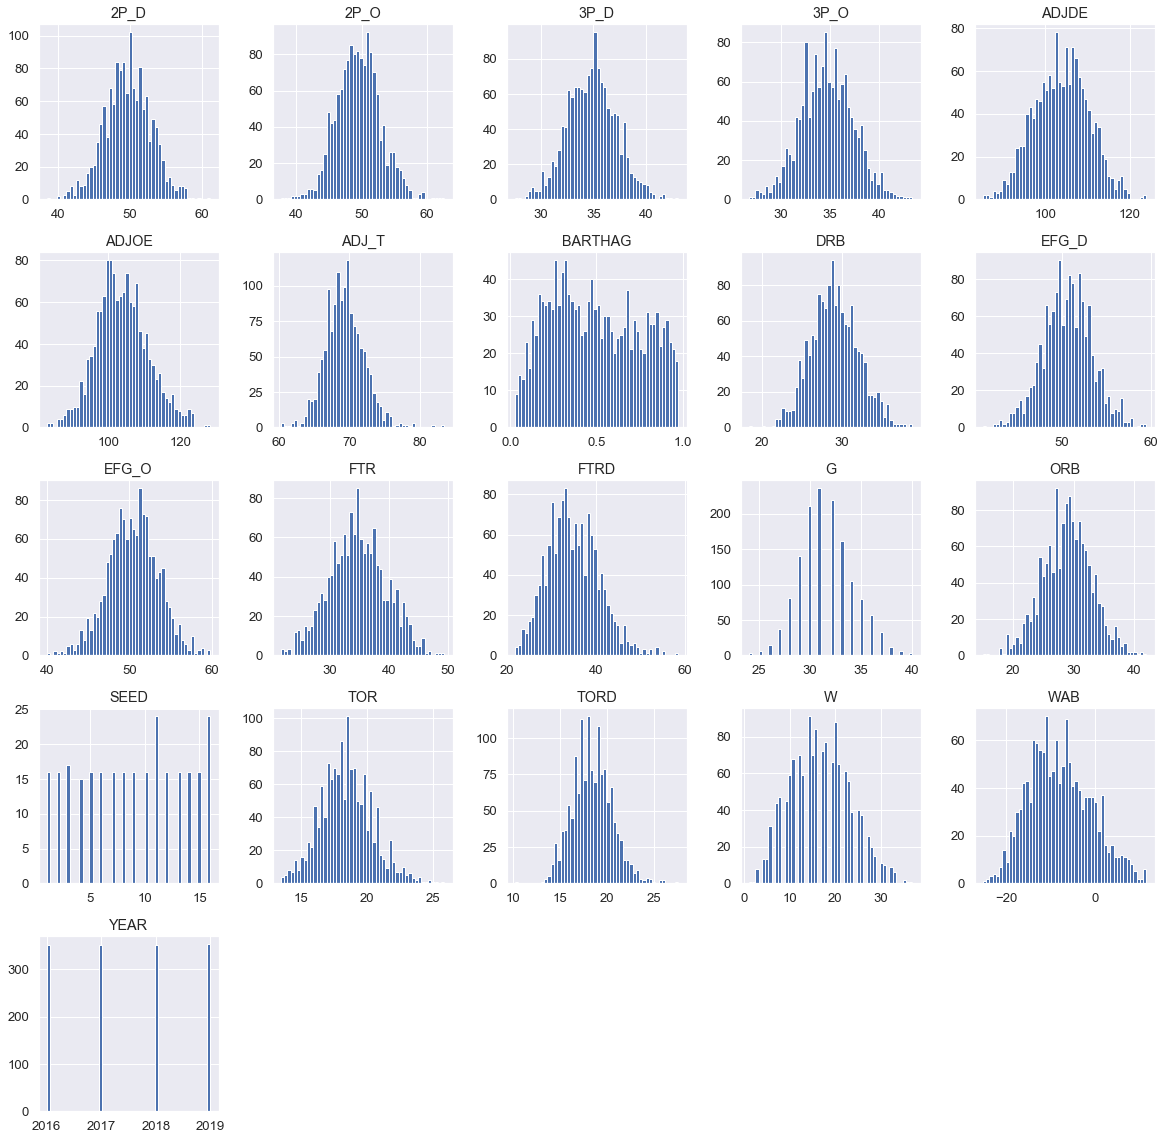

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

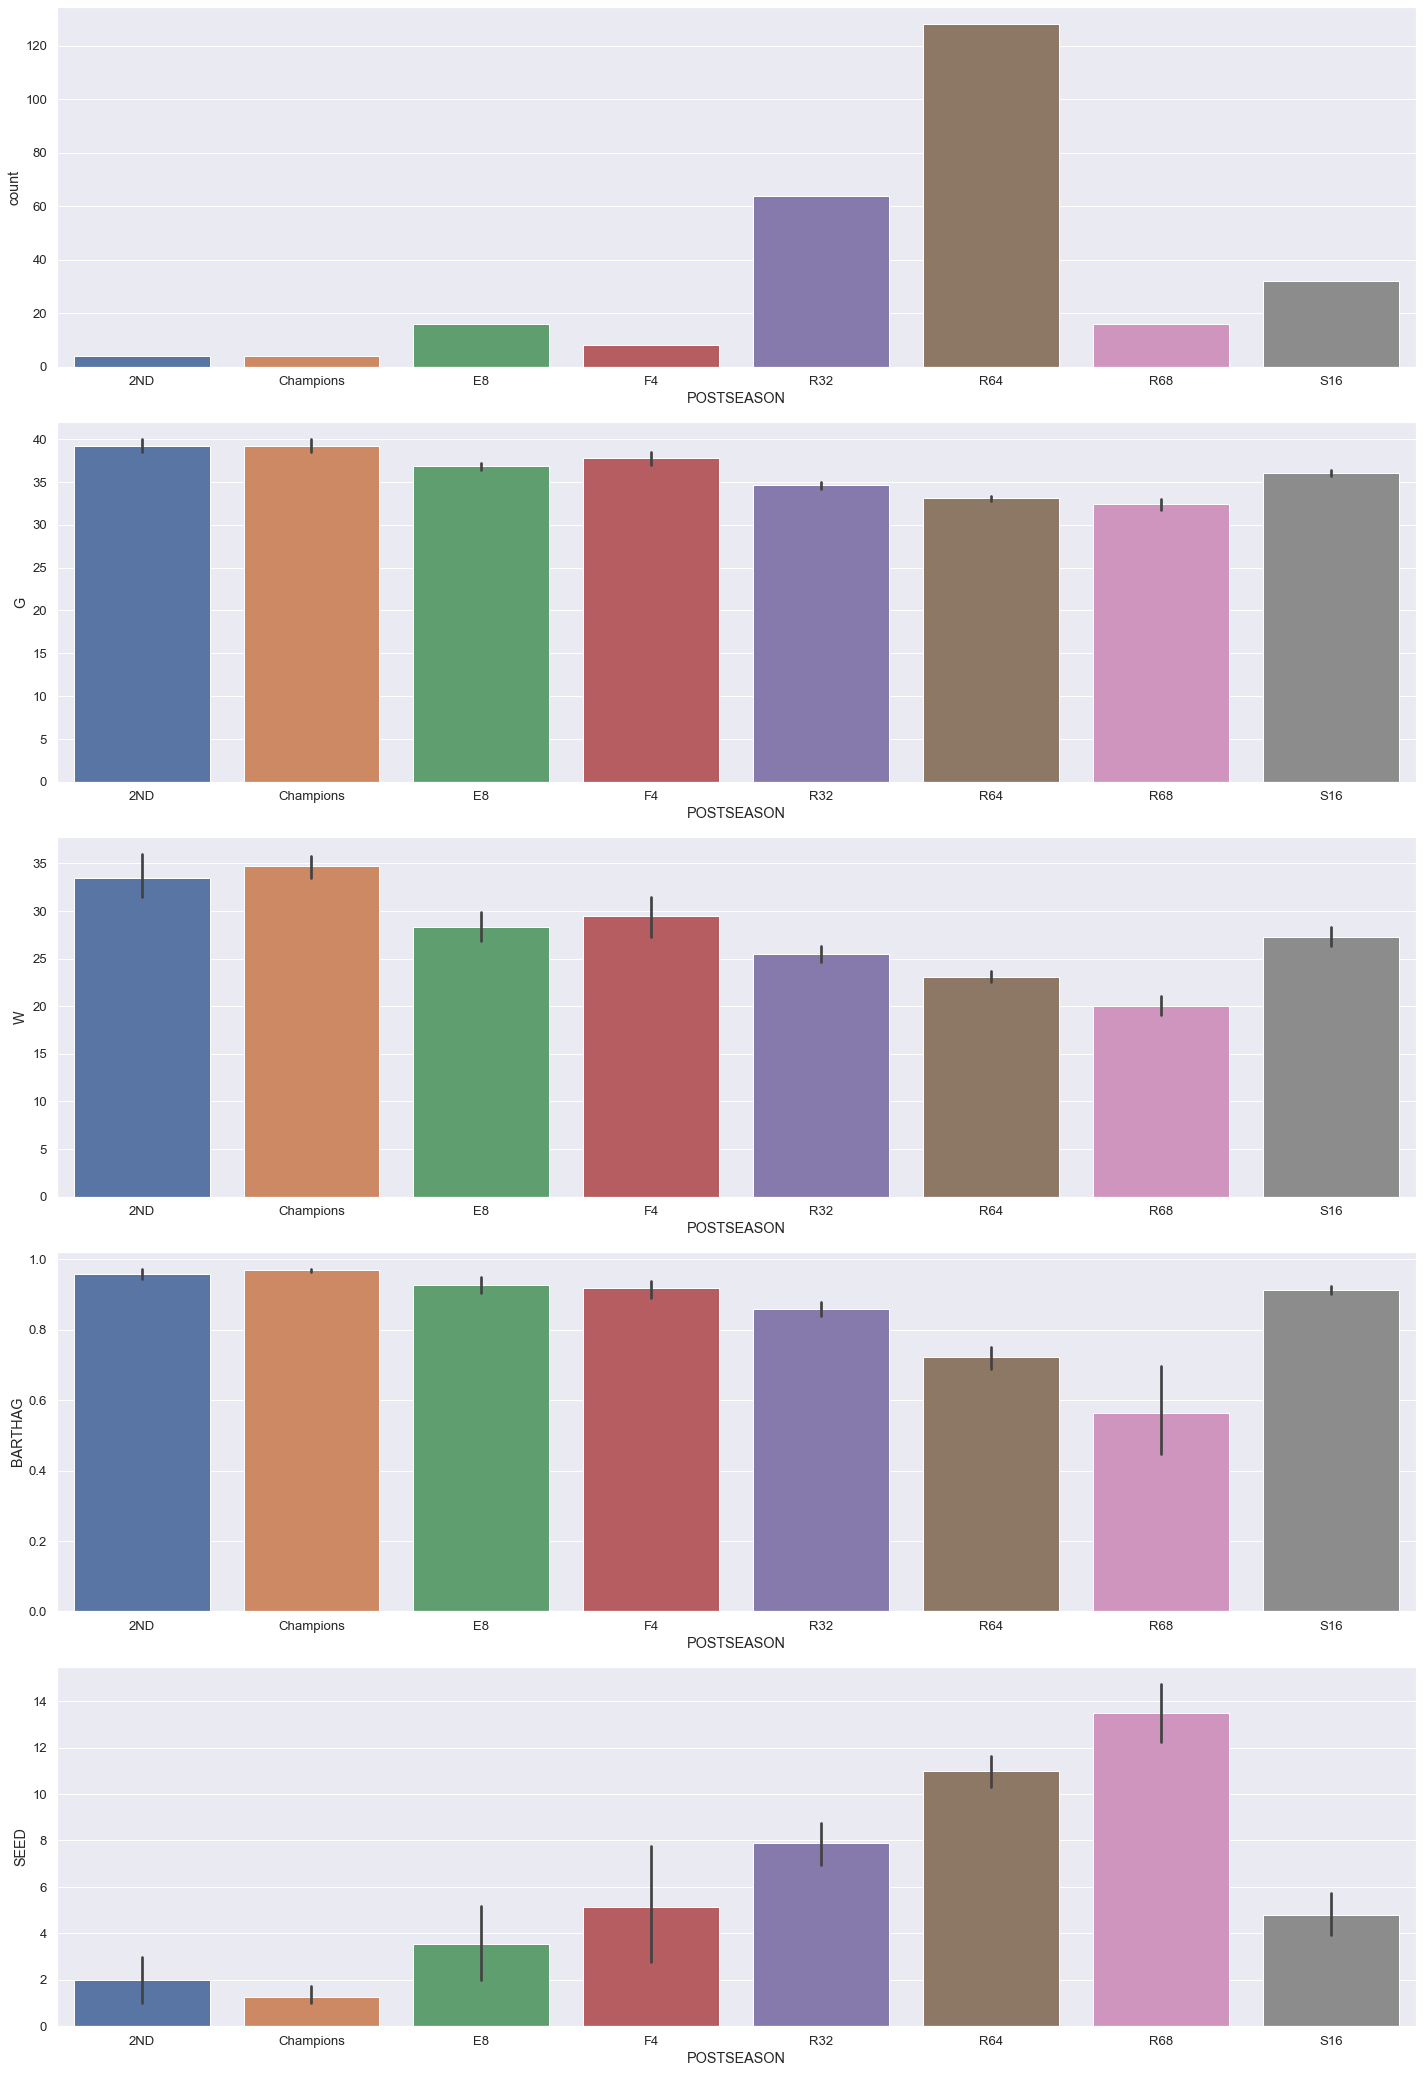

In [12]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
sns.countplot(df.POSTSEASON)

plt.subplot(7,1,2)
sns.barplot(x=df.POSTSEASON, y=df.G)

plt.subplot(7,1,3)
sns.barplot(x=df.POSTSEASON, y=df.W)

plt.subplot(7,1,4)
sns.barplot(x=df.POSTSEASON, y=df.BARTHAG)

plt.subplot(7,1,5)
sns.barplot(x=df.POSTSEASON, y=df.SEED)

plt.tight_layout()
plt.show()

In [13]:
df.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
G,1.000000,0.694294,0.610036,-0.606560,0.684179,0.351768,-0.489071,-0.324177,0.070928,0.276452,-0.168511,0.093426,-0.277845,0.343096,-0.446854,0.220460,-0.348541,-0.073626,0.665949,-0.605589,0.042113
W,0.694294,1.000000,0.740726,-0.697598,0.808328,0.624627,-0.629084,-0.437440,0.163512,0.315491,-0.362473,0.127848,-0.310100,0.586644,-0.542603,0.432303,-0.500085,-0.056288,0.901692,-0.579559,0.073508
ADJOE,0.610036,0.740726,1.000000,-0.541147,0.876854,0.733943,-0.350522,-0.584143,-0.100177,0.289171,-0.243611,0.072360,-0.372815,0.637790,-0.346566,0.578285,-0.201922,0.039005,0.852331,-0.803857,-0.016709
ADJDE,-0.606560,-0.697598,-0.541147,1.000000,-0.855484,-0.262971,0.789522,0.220306,-0.229428,-0.274805,0.381923,-0.099570,0.195381,-0.286613,0.722451,-0.132148,0.560496,0.216587,-0.816995,0.699601,-0.018837
BARTHAG,0.684179,0.808328,0.876854,-0.855484,1.000000,0.566685,-0.632959,-0.464304,0.059057,0.316404,-0.343430,0.105572,-0.328662,0.526996,-0.593379,0.401678,-0.423502,-0.092839,0.943035,-0.827624,0.001464
EFG_O,0.351768,0.624627,0.733943,-0.262971,0.566685,1.000000,-0.169170,-0.343668,-0.128320,-0.105013,-0.310620,-0.077106,-0.403423,0.887056,-0.148363,0.754215,-0.129869,0.039121,0.578435,-0.310675,0.108600
EFG_D,-0.489071,-0.629084,-0.350522,0.789522,-0.632959,-0.169170,1.000000,0.109440,0.002917,-0.311194,0.233499,-0.177110,0.126941,-0.192840,0.901366,-0.076390,0.723797,0.207273,-0.641557,0.385737,0.116721
TOR,-0.324177,-0.437440,-0.584143,0.220306,-0.464304,-0.343668,0.109440,1.000000,0.082966,0.127515,0.142924,0.133536,0.295218,-0.259642,0.097793,-0.315127,0.071761,-0.042741,-0.453637,0.266268,0.064392
TORD,0.070928,0.163512,-0.100177,-0.229428,0.059057,-0.128320,0.002917,0.082966,1.000000,0.107461,0.261749,0.093449,0.380354,-0.066384,0.055925,-0.155566,-0.101289,-0.004097,0.107251,0.080201,0.056249
ORB,0.276452,0.315491,0.289171,-0.274805,0.316404,-0.105013,-0.311194,0.127515,0.107461,1.000000,-0.011514,0.261221,0.116237,-0.051205,-0.314253,-0.111172,-0.175745,-0.016860,0.342269,-0.327773,-0.129806


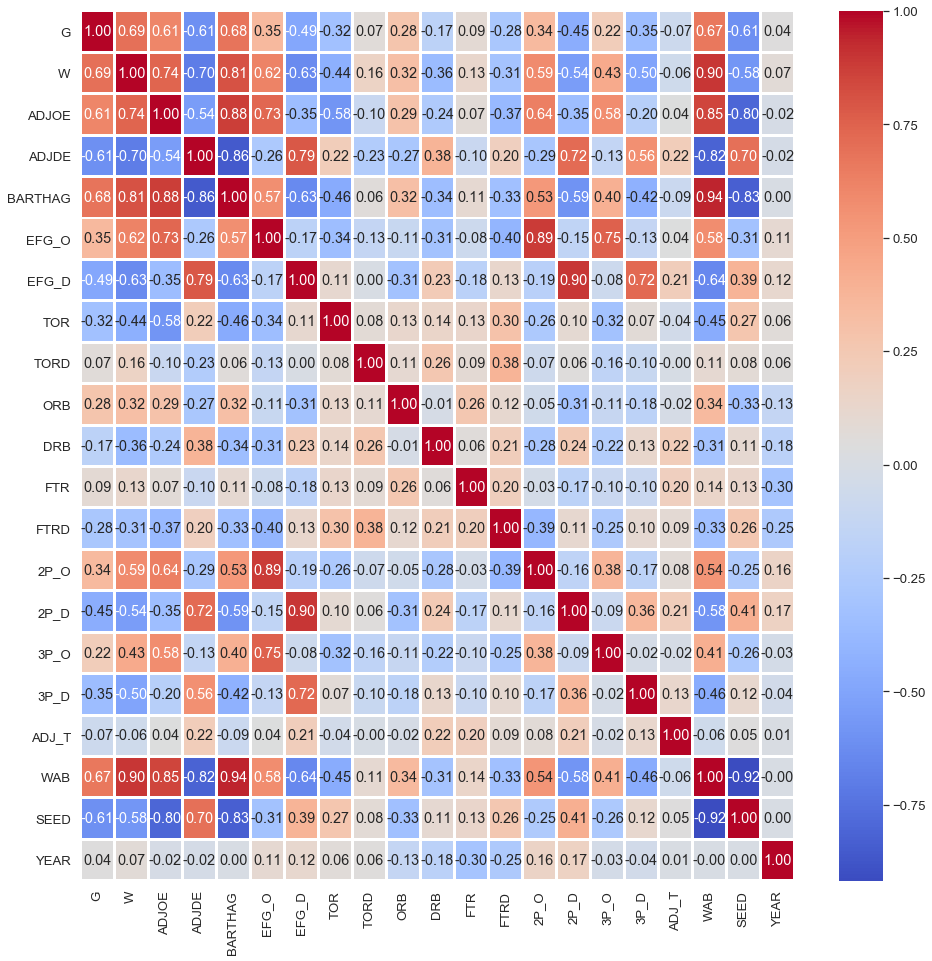

In [15]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [16]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,18.2,34.4,26.0,31.6,37.3,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,2019
268,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,2019
269,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,20.9,29.6,28.8,29.4,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
270,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,37.1,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019


In [21]:
df1 = df[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]

In [22]:
df1

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016
60,Duke,ACC,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,S16,4.0,2016
61,Miami FL,ACC,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,29.5,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,S16,3.0,2016
62,Indiana,B10,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,S16,5.0,2016
63,Maryland,B10,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,29.9,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,S16,5.0,2016


In [23]:
df1["POSTSEASON"].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

### Treat Duplicate Values

In [24]:
df1.duplicated(keep='first').sum()

0

### Drop unwanted features

In [25]:
df1.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [26]:
df1.drop(['TEAM', 'CONF', 'YEAR'],axis=1,inplace=True)

In [27]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0
7,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0
60,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,S16,4.0
61,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,29.5,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,S16,3.0
62,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,S16,5.0
63,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,29.9,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,S16,5.0


In [28]:
df1.columns

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

In [29]:
df1 = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'POSTSEASON']]

In [30]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,POSTSEASON
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,E8
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,E8
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,E8
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,E8
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,F4
7,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,2.0,F4
60,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,4.0,S16
61,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,29.5,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,3.0,S16
62,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,5.0,S16
63,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,29.9,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,5.0,S16


In [31]:
df1.reset_index(inplace=True, drop=True)

In [32]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,POSTSEASON
0,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,E8
1,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,E8
2,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,E8
3,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,E8
4,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,F4
5,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,2.0,F4
6,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,4.0,S16
7,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,29.5,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,3.0,S16
8,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,5.0,S16
9,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,29.9,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,5.0,S16


### Create and save processed dataset

In [33]:
#df1.to_csv("train.csv",index=False)

### Train Test Split

In [34]:
df = pd.read_csv("train.csv")

In [35]:
df

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,POSTSEASON
0,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,E8
1,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,E8
2,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,E8
3,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,E8
4,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,F4
5,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,2.0,F4
6,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,4.0,S16
7,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,29.5,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,3.0,S16
8,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,5.0,S16
9,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,29.9,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,5.0,S16


In [36]:
df.shape

(56, 21)

In [37]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [38]:
X

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0
1,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0
2,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0
3,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,30.5,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0
4,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,35.3,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0
5,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,2.0
6,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,4.0
7,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,17.4,30.1,29.5,40.7,29.1,53.2,46.9,37.5,34.4,67.0,6.9,3.0
8,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,5.0
9,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,16.4,29.1,29.9,37.0,27.0,55.8,45.5,36.2,32.1,67.9,4.0,5.0


In [39]:
y

0      E8
1      E8
2      E8
3      E8
4      F4
5      F4
6     S16
7     S16
8     S16
9     S16
10    S16
11    S16
12    S16
13    S16
14     E8
15     E8
16     E8
17     E8
18     F4
19     F4
20    S16
21    S16
22    S16
23    S16
24    S16
25    S16
26    S16
27    S16
28     E8
29     E8
30     E8
31     E8
32     F4
33     F4
34    S16
35    S16
36    S16
37    S16
38    S16
39    S16
40    S16
41    S16
42     E8
43     E8
44     E8
45     E8
46     F4
47     F4
48    S16
49    S16
50    S16
51    S16
52    S16
53    S16
54    S16
55    S16
Name: POSTSEASON, dtype: object

In [40]:
encoder = LabelEncoder()

In [41]:
y = encoder.fit_transform(y)

Encoded Values : E8 = 0, F4 = 1, S16 = 2

In [42]:
y

array([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
X.values

array([[ 36. ,  24. , 118.3, ...,  65.5,   2.3,   6. ],
       [ 37. ,  29. , 119.9, ...,  61.9,   8.6,   1. ],
       [ 37. ,  32. , 120.9, ...,  70.1,  11.6,   1. ],
       ...,
       [ 38. ,  25. , 108.1, ...,  65.4,  -1.1,  12. ],
       [ 35. ,  28. , 117.9, ...,  71.2,   7.3,   3. ],
       [ 36. ,  31. , 122.8, ...,  68.8,   9.9,   2. ]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 20), (12, 20), (44,), (12,))

### Feature Scaling

In [46]:
X_train

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0
5,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0,2.0
10,35,22,108.8,93.5,0.8509,48.5,48.1,17.1,18.6,33.1,27.7,38.0,33.6,46.6,44.8,34.9,37.4,64.1,0.4,7.0
23,34,27,116.4,93.9,0.9226,52.5,46.1,20.6,17.1,39.8,29.4,33.9,30.1,52.2,45.0,35.3,32.2,65.1,7.9,3.0
8,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,56.1,49.0,41.6,34.3,69.5,3.2,5.0
12,37,28,113.0,92.2,0.9126,51.2,47.4,17.4,20.7,34.8,29.2,38.1,32.3,51.3,45.6,34.1,33.3,68.4,5.2,3.0
47,39,30,121.3,95.2,0.9420,54.4,51.7,16.8,24.6,31.6,32.8,30.9,36.4,51.7,51.4,38.1,34.8,69.3,6.1,5.0
30,37,25,109.6,93.7,0.8584,52.6,49.1,17.2,21.6,25.9,31.9,33.8,36.8,53.4,48.9,34.1,33.0,66.5,2.5,9.0
1,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0
6,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,17.4,33.2,34.7,40.6,25.3,51.0,48.9,38.5,34.0,68.7,4.2,4.0


In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled

array([[-4.95260557e-01, -1.41675833e+00,  2.09830640e-01,
         2.63576186e+00, -2.50327465e+00,  1.69915885e-01,
         8.36073894e-01, -1.07452698e+00, -1.86103702e+00,
         8.26675916e-02,  1.23492275e+00, -6.33490382e-01,
        -9.65882836e-01,  9.11769543e-02,  3.16885795e-02,
         2.66148882e-01,  1.48370163e+00, -1.12016167e+00,
        -1.20799706e+00,  6.55937033e-01],
       [ 3.42872693e-01,  3.24508891e-01,  1.85849995e-01,
         7.40418098e-02,  2.84882679e-01,  2.87962710e-01,
        -2.62766081e-01,  8.52613801e-01, -6.35710274e-01,
        -2.98875139e-01,  6.21383148e-01, -6.06994586e-01,
        -5.39782823e-01, -1.52039519e+00, -4.60416420e-01,
         2.10912081e+00,  1.09325383e-01,  7.35106097e-01,
         6.48410185e-01, -7.51927818e-01],
       [-1.33339381e+00, -2.11326522e+00, -2.06833059e+00,
        -9.30268892e-02, -1.87020203e+00, -1.99427591e+00,
         1.67214779e-01,  8.17574878e-02, -2.55436454e-01,
         1.84412320e-01, -4.5

In [51]:
X_test_scaled

array([[ 1.18100594,  1.71752267,  0.08992742, -0.00949254,  0.27169367,
         0.76015001, -0.64497129,  0.08175749,  0.04033207,  0.00635905,
         0.2379209 , -0.23605345, -0.91030457,  0.63979726, -0.13234642,
         0.49652037, -0.96440606, -0.10501516, -0.00296078, -0.39996161],
       [-1.33339381, -0.371998  , -0.00599516,  0.18542094,  0.05275605,
         0.64210319, -1.40938171,  0.08175749, -1.73427908, -0.0699495 ,
        -1.10419698, -0.23605345, -0.576835  ,  0.57121972, -0.82949517,
         0.41972988, -1.35094938, -0.17502526, -1.27313415,  2.4157681 ],
       [-1.33339381, -0.72025144,  0.08992742, -0.12087167,  0.36665456,
         0.79949895,  0.59719564,  0.21023354,  1.01214294, -0.70585405,
        -0.64404228, -0.89844834, -0.91030457,  0.09117695,  1.05690733,
         1.03405385, -0.32016719, -1.26018188, -0.32864626, -0.04799539],
       [ 0.34287269,  1.36926922,  0.04196613,  0.49171356, -0.16090596,
         0.05186906, -0.02388783, -0.23943264, -

In [52]:
y_train

array([0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0])

In [53]:
y_test

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Build LR model

In [54]:
lrmodel = LogisticRegression(random_state=123, multi_class='multinomial')

In [55]:
lrmodel.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = lrmodel.predict(X_test_scaled)

In [57]:
y_pred

array([1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2])

In [58]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0, 0],
       [0, 1, 0],
       [2, 2, 7]], dtype=int64)

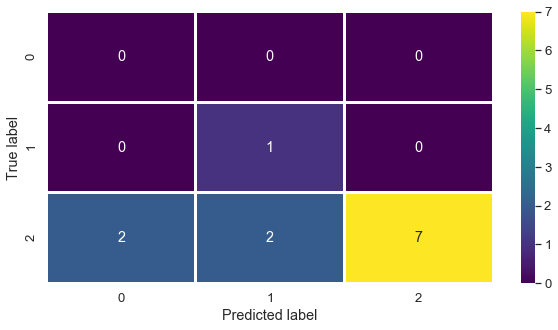

In [59]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      1.00      0.50         1
           2       1.00      0.64      0.78        11

    accuracy                           0.67        12
   macro avg       0.44      0.55      0.43        12
weighted avg       0.94      0.67      0.75        12



In [61]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [62]:
precision_score(y_test,y_pred,average='micro')

0.6666666666666666

In [63]:
jaccard_score(y_test,y_pred,average='micro')

0.5

In [64]:
lrmodelcv = LogisticRegressionCV(cv=10,scoring='accuracy',random_state=123,multi_class='multinomial')

In [65]:
lrmodelcv.fit(X_train_scaled,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=123, refit=True,
                     scoring='accuracy', solver='lbfgs', tol=0.0001, verbose=0)

In [66]:
y_pred2 = lrmodelcv.predict(X_test_scaled)

In [67]:
y_pred2

array([1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2])

In [68]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[0, 0, 0],
       [0, 1, 0],
       [2, 2, 7]], dtype=int64)

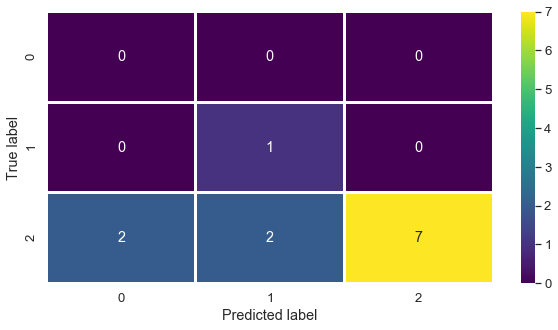

In [69]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [70]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      1.00      0.50         1
           2       1.00      0.64      0.78        11

    accuracy                           0.67        12
   macro avg       0.44      0.55      0.43        12
weighted avg       0.94      0.67      0.75        12



### Cross Validation

In [71]:
cv = cross_validate(lrmodel,X,y,scoring='accuracy',cv=10,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [72]:
cv

{'fit_time': array([0.03774977, 0.03125048, 0.03124046, 0.03124189, 0.0221312 ,
        0.01562214, 0.03124166, 0.0221262 , 0.03124738, 0.01562119]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01562309, 0.        , 0.        , 0.        ]),
 'test_score': array([0.5       , 0.66666667, 0.5       , 0.16666667, 0.5       ,
        0.33333333, 0.6       , 0.4       , 0.8       , 0.4       ])}

### Using RandomSearchCV

In [73]:
modelrs = LogisticRegression(random_state=123,n_jobs=-1,multi_class='multinomial')

In [74]:
parameters = {'C': np.arange(0.01,0.10,0.01),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }

In [75]:
randm = RandomizedSearchCV(estimator=modelrs, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [76]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='multinomial',
                                                n_jobs=-1, penalty='l2',
                                                random_state=123,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                  

In [77]:
randm.best_estimator_

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
randm.best_score_

0.6075757575757577

In [79]:
randm.best_params_

{'solver': 'saga', 'C': 0.02}

### Final Model

In [80]:
lrfinal = LogisticRegression(C=0.02,solver='saga',random_state=123,n_jobs=-1,multi_class='multinomial')

In [81]:
lrfinal.fit(X_train_scaled,y_train)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred3 = lrfinal.predict(X_test_scaled)

In [83]:
y_pred3

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [84]:
cm = confusion_matrix(y_test,y_pred3)
cm

array([[ 0,  0,  0],
       [ 1,  0,  0],
       [ 1,  0, 10]], dtype=int64)

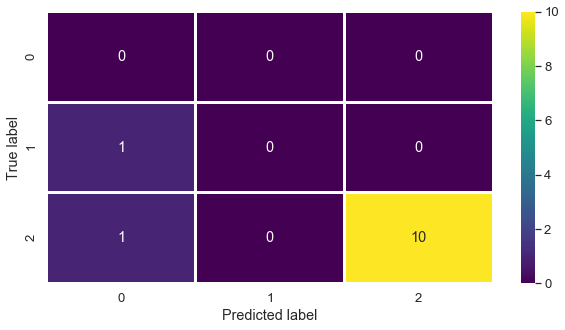

In [85]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [86]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.91      0.95        11

    accuracy                           0.83        12
   macro avg       0.33      0.30      0.32        12
weighted avg       0.92      0.83      0.87        12



In [87]:
jaccard_score(y_test,y_pred3,average='micro')

0.7142857142857143

### Load Test Data

In [88]:
testdata = pd.read_csv("test_whole_norm.csv")

In [89]:
testdata

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,1.135991,1.754007,0.154476,-1.839971,1.339826,0.045622,-0.922276,-0.366593,0.640072,0.496676,-2.429724,2.629968,1.012921,0.266945,-1.252677,-0.240567,0.185270,-0.445996,1.106204,-0.858348
1,0.363958,1.754007,0.771729,-0.136948,0.802268,1.524737,-1.304033,-0.641783,-0.737939,0.335964,-0.279234,0.705362,-0.157347,1.415428,-1.514542,1.259626,-0.026640,-0.934313,0.729242,-0.858348
2,-0.408074,-0.244745,-1.697280,-1.702631,0.248744,-1.904120,-1.388867,0.114990,0.915674,0.550247,0.796010,0.705362,0.324528,-1.254019,-1.028221,-2.228322,-1.170955,-0.804095,0.100972,-0.187014
3,1.135991,1.182935,1.937650,1.373798,0.544134,1.659202,0.265412,-1.742544,-0.659196,-1.271154,1.333633,0.247122,-1.258775,1.787909,0.505560,0.884578,-0.196168,-1.357520,0.980550,-0.522681
4,1.908024,2.896150,0.794590,-2.636547,1.717713,-0.626703,-3.255234,-0.504188,0.915674,1.835942,1.180026,1.896785,0.049171,-0.384897,-2.599411,-0.653120,-2.527181,-1.487738,2.394157,-1.194015
5,1.908024,-0.244745,-0.119858,-0.274289,0.347207,-0.055227,-1.007111,0.321383,-0.974170,0.228823,-0.663250,-0.669357,1.305487,-0.509057,-0.841174,0.697054,-0.662371,-1.357520,-0.778606,0.819986
6,1.135991,-0.530281,0.634561,-0.301757,0.826219,-0.593087,-0.795024,0.802966,-0.501709,1.969868,0.949617,-0.096558,1.098970,-0.478017,-0.167807,-0.315576,-1.298101,0.595746,0.320866,-0.187014
7,-0.408074,-1.672425,-0.622804,0.879372,-1.363929,-1.366260,-0.752606,-0.710581,-1.604117,0.335964,0.565601,-0.073646,0.565465,-1.595460,-0.915993,-0.390586,-0.026640,-1.097085,-1.375463,1.155653
8,-1.180107,-1.101353,-1.194334,-1.400482,0.405753,-1.366260,-1.346450,0.390181,0.285726,-0.306883,1.026420,-0.646445,-0.518753,-1.316099,-1.439723,-0.878149,-0.577607,-0.185560,-0.307404,-0.522681
9,-0.408074,-1.672425,-1.148612,0.824436,-2.053173,-1.265411,0.519916,0.390181,-0.422965,0.309179,-0.048825,0.018002,0.152430,-1.564420,-0.242626,0.059472,1.075293,-0.413441,-1.721011,2.162653


In [90]:
testpred = lrfinal.predict(testdata)

In [91]:
testpred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [92]:
testdf = pd.DataFrame(testpred,columns=['PREDICTION'])
testdf

,PREDICTION
0,0
1,0
2,2
3,0
4,0
5,2
6,0
7,2
8,2
9,2


Encoded Values : E8 = 0, F4 = 1, S16 = 2

In [93]:
#Load Actual Test Dataset to compare
testdataactual = pd.read_csv("actualtest.csv")

In [94]:
testdataactual

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,Arizona,P12,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,22.4,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,E8,2.0,2020
1,Gonzaga,WCC,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,28.0,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,E8,2.0,2020
2,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,30.8,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0,2020
3,Notre Dame,ACC,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,32.2,36.7,24.1,58.2,47.4,39.0,32.6,63.9,8.6,E8,3.0,2020
4,Kentucky,SEC,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,31.8,43.9,31.7,51.2,39.1,34.9,27.1,63.5,13.1,F4,1.0,2020
5,Michigan St.,B10,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,27.0,32.7,39.0,50.8,43.8,38.5,31.5,63.9,3.0,F4,7.0,2020
6,North Carolina,ACC,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,31.2,35.2,37.8,50.9,45.6,35.8,30.0,69.9,6.5,S16,4.0,2020
7,North Carolina St.,ACC,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,30.2,35.3,34.7,47.3,43.6,35.6,33.0,64.7,1.1,S16,8.0,2020
8,Oklahoma,B12,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,31.4,32.8,28.4,48.2,42.2,34.3,31.7,67.5,4.5,S16,3.0,2020
9,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,2020


In [95]:
le = LabelEncoder()

In [96]:
testdataactual["POSTSEASONENCODED"] = le.fit_transform(testdataactual["POSTSEASON"])

In [97]:
testdataactual

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASONENCODED
0,Arizona,P12,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,22.4,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,E8,2.0,2020,0
1,Gonzaga,WCC,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,28.0,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,E8,2.0,2020,0
2,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,30.8,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0,2020,0
3,Notre Dame,ACC,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,32.2,36.7,24.1,58.2,47.4,39.0,32.6,63.9,8.6,E8,3.0,2020,0
4,Kentucky,SEC,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,31.8,43.9,31.7,51.2,39.1,34.9,27.1,63.5,13.1,F4,1.0,2020,1
5,Michigan St.,B10,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,27.0,32.7,39.0,50.8,43.8,38.5,31.5,63.9,3.0,F4,7.0,2020,1
6,North Carolina,ACC,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,31.2,35.2,37.8,50.9,45.6,35.8,30.0,69.9,6.5,S16,4.0,2020,2
7,North Carolina St.,ACC,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,30.2,35.3,34.7,47.3,43.6,35.6,33.0,64.7,1.1,S16,8.0,2020,2
8,Oklahoma,B12,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,31.4,32.8,28.4,48.2,42.2,34.3,31.7,67.5,4.5,S16,3.0,2020,2
9,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,2020,2


In [98]:
combineddf = pd.concat([testdataactual,testdf],axis=1)

In [99]:
combineddf

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASONENCODED,PREDICTION
0,Arizona,P12,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,22.4,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,E8,2.0,2020,0,0
1,Gonzaga,WCC,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,28.0,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,E8,2.0,2020,0,0
2,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,30.8,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0,2020,0,2
3,Notre Dame,ACC,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,32.2,36.7,24.1,58.2,47.4,39.0,32.6,63.9,8.6,E8,3.0,2020,0,0
4,Kentucky,SEC,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,31.8,43.9,31.7,51.2,39.1,34.9,27.1,63.5,13.1,F4,1.0,2020,1,0
5,Michigan St.,B10,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,27.0,32.7,39.0,50.8,43.8,38.5,31.5,63.9,3.0,F4,7.0,2020,1,2
6,North Carolina,ACC,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,31.2,35.2,37.8,50.9,45.6,35.8,30.0,69.9,6.5,S16,4.0,2020,2,0
7,North Carolina St.,ACC,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,30.2,35.3,34.7,47.3,43.6,35.6,33.0,64.7,1.1,S16,8.0,2020,2,2
8,Oklahoma,B12,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,31.4,32.8,28.4,48.2,42.2,34.3,31.7,67.5,4.5,S16,3.0,2020,2,2
9,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,2020,2,2


### Model Evaluation for Test Data

In [100]:
y_true = combineddf["POSTSEASONENCODED"]

In [101]:
y_pred = combineddf["PREDICTION"]

In [102]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         2
           2       0.78      0.88      0.82         8

    accuracy                           0.71        14
   macro avg       0.46      0.54      0.50        14
weighted avg       0.62      0.71      0.66        14



In [103]:
accuracy_score(y_true, y_pred)

0.7142857142857143

In [104]:
jaccard_score(y_true, y_pred, average='micro')

0.5555555555555556

In [105]:
f1_score(y_true, y_pred, average='micro')

0.7142857142857143

In [106]:
y_pred4 = lrfinal.predict_proba(testdata)

In [107]:
y_pred4

array([[0.55071554, 0.1005654 , 0.34871906],
       [0.47758554, 0.13511651, 0.38729795],
       [0.36743352, 0.1548288 , 0.47773767],
       [0.43335453, 0.16123739, 0.40540808],
       [0.57690486, 0.18008926, 0.24300587],
       [0.37267816, 0.2343795 , 0.39294234],
       [0.43600788, 0.18978705, 0.37420507],
       [0.28445477, 0.14539155, 0.57015368],
       [0.29568854, 0.16502548, 0.53928597],
       [0.26031414, 0.16718919, 0.57249667],
       [0.37802205, 0.13355582, 0.48842213],
       [0.26660327, 0.12195256, 0.61144416],
       [0.26616987, 0.09437822, 0.63945191],
       [0.36289902, 0.14305057, 0.49405041]])

In [108]:
log_loss(y_true, y_pred4)

0.8156359935722008

In [109]:
filename = 'basketballmodel.sav'
dump(lrfinal,open(filename,'wb'))

### Conclusion: Model have problem predicting Final Four (F4)

Now, it is your turn, use the training set to build an accurate model. Then use the validation set to report the accuracy of the model You should use the following algorithm:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression



### Model Training

### Using PyCaret

In [110]:
exp_class = setup(data = df, target = 'POSTSEASON', session_id=123, normalize=True, 
                  train_size=0.8, numeric_features=['G','W']) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"E8: 0, F4: 1, S16: 2"
3,Original Data,"(56, 21)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [111]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.610000,0.000000,0.544400,0.517700,0.536000,0.309700
1,Ridge Classifier,0.590000,0.000000,0.508300,0.538700,0.523900,0.265600
2,Light Gradient Boosting Machine,0.590000,0.000000,0.450000,0.391900,0.455100,0.082800
3,Logistic Regression,0.585000,0.000000,0.508300,0.534300,0.518700,0.268400
4,Quadratic Discriminant Analysis,0.565000,0.000000,0.400000,0.325200,0.411000,0.000000
5,Linear Discriminant Analysis,0.550000,0.000000,0.497200,0.550800,0.527700,0.265500
6,CatBoost Classifier,0.520000,0.000000,0.422200,0.379700,0.398500,0.022300
7,SVM - Linear Kernel,0.500000,0.000000,0.452800,0.486000,0.459800,0.156900
8,K Neighbors Classifier,0.475000,0.000000,0.333300,0.353500,0.379200,-0.033200
9,Extra Trees Classifier,0.475000,0.000000,0.411100,0.394700,0.383300,-0.001600


### K Nearest Neighbor (KNN)

### Question 1 Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)

In [112]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4000,0.0,0.2222,0.3000,0.3429,-0.2500
1,0.4000,0.0,0.3333,0.3000,0.3429,-0.3636
2,0.6000,0.0,0.5000,0.3600,0.4500,0.0000
3,0.6000,0.0,0.3333,0.4500,0.5143,0.2308
4,0.5000,0.0,0.4444,0.8750,0.5417,0.2727
5,0.5000,0.0,0.3333,0.3333,0.4000,0.1111
6,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
7,0.2500,0.0,0.1667,0.1667,0.2000,-0.3333
8,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
9,0.5000,0.0,0.3333,0.2500,0.3333,0.0000


In [113]:
knn

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

In [114]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 2 Determine and print the accuracy for the first 15 values of k the on the validation data:

### Decision Tree

In [115]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.20,0.0,0.1111,0.2000,0.2000,-0.4286
1,0.60,0.0,0.5000,0.3600,0.4500,0.0000
2,0.40,0.0,0.2222,0.4000,0.4000,0.0625
3,0.60,0.0,0.5000,0.3600,0.4500,0.0000
4,0.25,0.0,0.1111,0.3750,0.3000,-0.3333
5,0.50,0.0,0.5000,0.3750,0.4167,0.2000
6,0.25,0.0,0.1667,0.1667,0.2000,-0.3333
7,0.50,0.0,0.3333,0.2500,0.3333,0.0000
8,0.50,0.0,0.3333,0.2500,0.3333,0.0000
9,0.50,0.0,0.3333,0.2500,0.3333,0.0000


In [116]:
dt

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                        

In [117]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 3 Determine the minimum value for the parameter max_depth that improves results

In [118]:
tuned_dt = tune_model('dt', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.2000,0.0,0.1111,0.2000,0.2000,-0.4286
1,0.4000,0.0,0.4167,0.4333,0.4000,-0.1538
2,0.4000,0.0,0.2222,0.4000,0.4000,0.0625
3,0.4000,0.0,0.4167,0.4333,0.4000,-0.1538
4,0.7500,0.0,0.5000,0.5625,0.6429,0.0000
5,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
6,0.2500,0.0,0.1667,0.2500,0.2500,-0.2000
7,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
8,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
9,0.5000,0.0,0.3333,0.2500,0.3333,0.0000


In [119]:
tuned_dt

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=1,
                                                     max_features=7,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                           

### Support Vector Machine

### Question 4 Train the support vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

In [120]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6000,0.0,0.5556,0.6000,0.6000,0.2857
1,0.6000,0.0,0.5000,0.3600,0.4500,0.0000
2,0.2000,0.0,0.1111,0.3000,0.2400,-0.1765
3,0.6000,0.0,0.5833,0.6000,0.6000,0.1667
4,0.5000,0.0,0.4444,1.0000,0.6250,0.3333
5,0.7500,0.0,0.6667,0.5833,0.6500,0.5556
6,0.2500,0.0,0.3333,0.0833,0.1250,-0.0909
7,0.5000,0.0,0.5000,0.5833,0.4583,0.2727
8,0.2500,0.0,0.1667,0.1667,0.2000,-0.3333
9,0.7500,0.0,0.6667,0.5833,0.6500,0.5556


In [121]:
svm

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

In [122]:
rbfsvm = create_model('rbfsvm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6000,0.0,0.3333,0.3600,0.4500,0.0000
1,0.6000,0.0,0.5000,0.3600,0.4500,0.0000
2,0.6000,0.0,0.5000,0.3600,0.4500,0.0000
3,0.6000,0.0,0.5000,0.3600,0.4500,0.0000
4,0.7500,0.0,0.5556,1.0000,0.8500,0.5556
5,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
6,0.2500,0.0,0.1667,0.1667,0.2000,-0.3333
7,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
8,0.5000,0.0,0.3333,0.2500,0.3333,0.0000
9,0.5000,0.0,0.3333,0.2500,0.3333,0.0000


In [123]:
rbfsvm

OneVsRestClassifier(estimator=SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='auto', kernel='rbf', max_iter=-1,
                                  probability=True, random_state=123,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [124]:
evaluate_model(svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [126]:
evaluate_model(rbfsvm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 5 Train a logistic regression model and determine the accuracy of the validation data (set C =0.01)

In [127]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.6667,0.6500,0.7143,0.5833
1,0.6000,0.0,0.5000,0.3600,0.4500,0.0000
2,0.4000,0.0,0.2222,0.4000,0.4000,-0.0714
3,0.8000,0.0,0.7500,0.8500,0.7810,0.5455
4,0.5000,0.0,0.4444,1.0000,0.6250,0.3333
5,0.7500,0.0,0.6667,0.5833,0.6500,0.5556
6,0.2500,0.0,0.3333,0.0833,0.1250,-0.0909
7,0.5000,0.0,0.5000,0.5833,0.4583,0.2727
8,0.7500,0.0,0.6667,0.5833,0.6500,0.5556
9,0.5000,0.0,0.3333,0.2500,0.3333,0.0000


In [128]:
lr

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [129]:
tuned_lr = tune_model('lr', optimize='Accuracy', n_iter=20, ensemble=True, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6000,0.0,0.3333,0.3600,0.4500,0.0
1,0.6000,0.0,0.5000,0.3600,0.4500,0.0
2,0.6000,0.0,0.5000,0.3600,0.4500,0.0
3,0.6000,0.0,0.5000,0.3600,0.4500,0.0
4,0.7500,0.0,0.5000,0.5625,0.6429,0.0
5,0.5000,0.0,0.3333,0.2500,0.3333,0.0
6,0.5000,0.0,0.3333,0.2500,0.3333,0.0
7,0.5000,0.0,0.3333,0.2500,0.3333,0.0
8,0.5000,0.0,0.3333,0.2500,0.3333,0.0
9,0.5000,0.0,0.3333,0.2500,0.3333,0.0


In [130]:
tuned_lr

OneVsRestClassifier(estimator=LogisticRegression(C=0.027, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [131]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Model Evaluation using Test set

### Question 5 Calculate the F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data. For f1_score please set the average parameter to 'micro'.

In [139]:
testdata2 = pd.read_csv("test.csv")

In [141]:
testdata2

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,22.4,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,2.0
1,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,28.0,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,2.0
2,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,30.8,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,4.0
3,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,32.2,36.7,24.1,58.2,47.4,39.0,32.6,63.9,8.6,3.0
4,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,31.8,43.9,31.7,51.2,39.1,34.9,27.1,63.5,13.1,1.0
5,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,27.0,32.7,39.0,50.8,43.8,38.5,31.5,63.9,3.0,7.0
6,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,31.2,35.2,37.8,50.9,45.6,35.8,30.0,69.9,6.5,4.0
7,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,30.2,35.3,34.7,47.3,43.6,35.6,33.0,64.7,1.1,8.0
8,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,31.4,32.8,28.4,48.2,42.2,34.3,31.7,67.5,4.5,3.0
9,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,11.0


In [142]:
predict_model(knn,data=testdata2) #KNN

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,Label,Score
0,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,...,37.3,53.3,42.7,36.0,33.5,66.7,9.0,2.0,0,0.6
1,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,...,30.5,57.0,42.0,40.0,33.0,65.2,7.8,2.0,2,0.4
2,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,...,33.3,48.4,43.3,30.7,30.3,65.6,5.8,4.0,2,0.4
3,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,...,24.1,58.2,47.4,39.0,32.6,63.9,8.6,3.0,2,0.6
4,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,...,31.7,51.2,39.1,34.9,27.1,63.5,13.1,1.0,1,0.4
5,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,...,39.0,50.8,43.8,38.5,31.5,63.9,3.0,7.0,2,0.6
6,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,...,37.8,50.9,45.6,35.8,30.0,69.9,6.5,4.0,2,0.6
7,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,...,34.7,47.3,43.6,35.6,33.0,64.7,1.1,8.0,2,0.6
8,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,...,28.4,48.2,42.2,34.3,31.7,67.5,4.5,3.0,2,0.6
9,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,...,32.3,47.4,45.4,36.8,35.6,66.8,0.0,11.0,2,0.4


In [143]:
predict_model(dt,data=testdata2) #Decision Tree

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,Label,Score
0,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,...,37.3,53.3,42.7,36.0,33.5,66.7,9.0,2.0,1,0.5000
1,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,...,30.5,57.0,42.0,40.0,33.0,65.2,7.8,2.0,1,1.0000
2,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,...,33.3,48.4,43.3,30.7,30.3,65.6,5.8,4.0,1,1.0000
3,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,...,24.1,58.2,47.4,39.0,32.6,63.9,8.6,3.0,2,NaN
4,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,...,31.7,51.2,39.1,34.9,27.1,63.5,13.1,1.0,1,0.5000
5,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,...,39.0,50.8,43.8,38.5,31.5,63.9,3.0,7.0,1,1.0000
6,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,...,37.8,50.9,45.6,35.8,30.0,69.9,6.5,4.0,2,NaN
7,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,...,34.7,47.3,43.6,35.6,33.0,64.7,1.1,8.0,1,0.5000
8,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,...,28.4,48.2,42.2,34.3,31.7,67.5,4.5,3.0,2,0.5000
9,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,...,32.3,47.4,45.4,36.8,35.6,66.8,0.0,11.0,2,0.3333


In [144]:
predict_model(svm,data=testdata2) #SVM

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,Label
0,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,...,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,2.0,0
1,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,...,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,2.0,0
2,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,...,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,4.0,0
3,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,...,36.7,24.1,58.2,47.4,39.0,32.6,63.9,8.6,3.0,0
4,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,...,43.9,31.7,51.2,39.1,34.9,27.1,63.5,13.1,1.0,1
5,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,...,32.7,39.0,50.8,43.8,38.5,31.5,63.9,3.0,7.0,1
6,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,...,35.2,37.8,50.9,45.6,35.8,30.0,69.9,6.5,4.0,1
7,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,...,35.3,34.7,47.3,43.6,35.6,33.0,64.7,1.1,8.0,2
8,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,...,32.8,28.4,48.2,42.2,34.3,31.7,67.5,4.5,3.0,1
9,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,...,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,11.0,0


In [145]:
predict_model(tuned_lr,data=testdata2) #Logistic Regression

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,Label,Score
0,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,20.6,34.5,...,37.3,53.3,42.7,36.0,33.5,66.7,9.0,2.0,2,0.4605
1,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,17.1,33.9,...,30.5,57.0,42.0,40.0,33.0,65.2,7.8,2.0,2,0.5249
2,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,21.3,34.7,...,33.3,48.4,43.3,30.7,30.3,65.6,5.8,4.0,2,0.4689
3,38,32,125.3,98.6,0.9401,58.3,47.9,14.5,17.3,27.9,...,24.1,58.2,47.4,39.0,32.6,63.9,8.6,3.0,2,0.5011
4,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,21.3,39.5,...,31.7,51.2,39.1,34.9,27.1,63.5,13.1,1.0,0,0.4622
5,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,...,39.0,50.8,43.8,38.5,31.5,63.9,3.0,7.0,2,0.5147
6,38,26,119.6,92.5,0.9507,51.6,45.4,18.2,17.7,40.0,...,37.8,50.9,45.6,35.8,30.0,69.9,6.5,4.0,2,0.4806
7,36,22,114.1,96.8,0.8684,49.3,45.5,16.0,14.9,33.9,...,34.7,47.3,43.6,35.6,33.0,64.7,1.1,8.0,2,0.6024
8,35,24,111.6,88.5,0.9349,49.3,44.1,17.6,19.7,31.5,...,28.4,48.2,42.2,34.3,31.7,67.5,4.5,3.0,2,0.5745
9,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,...,32.3,47.4,45.4,36.8,35.6,66.8,0.0,11.0,2,0.6130
